In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Let's import necessary packages

import torch
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.nn.functional import one_hot

In [3]:
torch.__version__

'2.4.0+cpu'

In [4]:
# Let's get the MNIST dataset 

In [5]:

train_data = MNIST(root="/kaggle/working/mnist-data", train=True, download=True)
test_data = MNIST(root='/kaggle/working/mnist-data', train=False, download=True)


print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:01<00:00, 5022736.48it/s]


Extracting /kaggle/working/mnist-data/MNIST/raw/train-images-idx3-ubyte.gz to /kaggle/working/mnist-data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 146895.78it/s]


Extracting /kaggle/working/mnist-data/MNIST/raw/train-labels-idx1-ubyte.gz to /kaggle/working/mnist-data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1395394.68it/s]


Extracting /kaggle/working/mnist-data/MNIST/raw/t10k-images-idx3-ubyte.gz to /kaggle/working/mnist-data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2488313.58it/s]

Extracting /kaggle/working/mnist-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /kaggle/working/mnist-data/MNIST/raw

Training set size: 60000
Test set size: 10000


In [6]:
# Let's check the type of the images in the dataset

type(train_data[0])

tuple

In [7]:
# So, the image and the target is stored in a tuple, Let's check the type of the image and the target
type(train_data[0][0]), type(train_data[0][1]) 

(PIL.Image.Image, int)

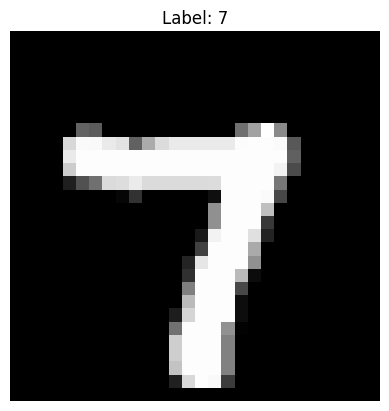

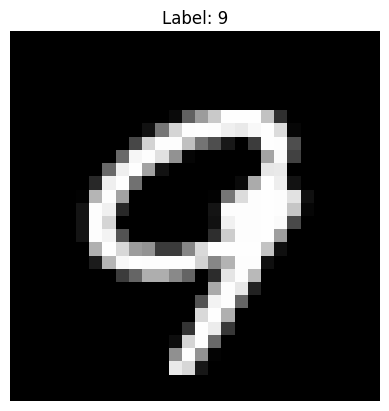

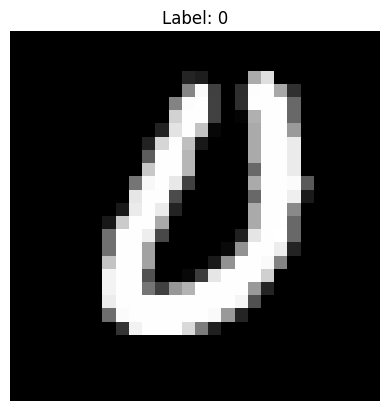

In [8]:
# OK, great let's look at some images in the dataset and their labels

for i in np.random.randint(0, 60000, 3):
    image, label = train_data[i]

    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

In [9]:
# Let's define a transform to convert images to tensors and normalize pixel values to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor()
])

In [10]:
train_data = MNIST(root='/kaggle/working/mnist-data', train=True, transform=ToTensor(), download=False)
test_data = MNIST(root='/kaggle/working/mnist-data', train=False, transform=ToTensor(), download=False)

In [11]:
# Now let's have a look at the the data
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [12]:
# Great, this is a tensor, let's check it shape
train_data[0][0].shape

torch.Size([1, 28, 28])

In [13]:
# Let's seperate the cross validation set aside

from torch.utils.data import random_split


cv_size = int(0.5 * len(test_data))  # 50% for CV
test_size = len(test_data) - cv_size  # Remaining 50% for Test

cv_data, test_data = random_split(test_data, [cv_size, test_size])

### Now let's seperate the training instance and the target from the tuple and create a 2d tensor of shape (number of instances, 1\*28\*28) containing all the instances and a 2d tensor of shape (number of instances, number of classes) containing one hot encoded version of all the targets for both train and the test set.

In [14]:
def transform_shape(data_set):
    
    data_examples = torch.zeros(size=(len(data_set), 1*28*28))
    targets = torch.zeros(size=(len(data_set), 1))
    
    for i,instance in enumerate(data_set):
        data_examples[i] = instance[0].reshape(1*28*28) 
        targets[i] = instance[1]
        
    targets = one_hot(targets.long(), 10).squeeze()
        
    return data_examples, targets
    

In [15]:
new_train_x, new_train_y = transform_shape(train_data)
new_test_x, new_test_y = transform_shape(test_data)
new_cv_x, new_cv_y = transform_shape(cv_data)

In [16]:
# Let's check thier shape
new_train_x.shape, new_train_y.shape, new_test_x.shape, new_test_y.shape, new_cv_x.shape, new_cv_y.shape

(torch.Size([60000, 784]),
 torch.Size([60000, 10]),
 torch.Size([5000, 784]),
 torch.Size([5000, 10]),
 torch.Size([5000, 784]),
 torch.Size([5000, 10]))

In [17]:
# Great, the data transformation was successful and the shapes look good, let's check one instance and its target

new_train_x[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [18]:
new_train_y[0]

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# The data is ready, let's build a Neural Network 😊

In [19]:
# Let's import some other necessary modules
from torch import nn
from torch.nn import Sequential
from torch.optim import Adam
from torch.optim.lr_scheduler import LambdaLR

In [20]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [21]:
my_model = Sequential(
    nn.Linear(new_train_x[0].shape[0],256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.Softmax(dim=1)
)

In [22]:
# Let's looka at parameters of our model

for name, param in my_model.named_parameters():
    print(f"Parameter Name: {name}")
    print(f"Shape: {param.shape}")
    print(param)
    print("-" * 50)

Parameter Name: 0.weight
Shape: torch.Size([256, 784])
Parameter containing:
tensor([[ 0.0185, -0.0123, -0.0186,  ...,  0.0145,  0.0119,  0.0208],
        [-0.0316,  0.0156,  0.0143,  ..., -0.0163, -0.0280, -0.0228],
        [-0.0324, -0.0011, -0.0244,  ...,  0.0083,  0.0080,  0.0009],
        ...,
        [-0.0128, -0.0282, -0.0222,  ...,  0.0151, -0.0328, -0.0321],
        [-0.0134, -0.0148, -0.0239,  ...,  0.0295,  0.0105,  0.0332],
        [ 0.0058,  0.0208,  0.0203,  ...,  0.0131, -0.0254, -0.0111]],
       requires_grad=True)
--------------------------------------------------
Parameter Name: 0.bias
Shape: torch.Size([256])
Parameter containing:
tensor([ 0.0283, -0.0259, -0.0341,  0.0146, -0.0283,  0.0245,  0.0158,  0.0330,
         0.0156, -0.0007, -0.0177,  0.0348,  0.0294, -0.0058, -0.0338,  0.0098,
        -0.0180,  0.0210,  0.0191,  0.0114, -0.0180,  0.0179,  0.0245, -0.0053,
         0.0316,  0.0214, -0.0167,  0.0071,  0.0274, -0.0073,  0.0174,  0.0300,
        -0.0184,  0.0

In [23]:
# Now we've got a model, let's see what happens when we pass some data through it.

untrained_preds = my_model(new_cv_x.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(new_cv_y)}, Shape: {new_cv_y.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{new_cv_y[:10]}")

Length of predictions: 5000, Shape: torch.Size([5000, 10])
Length of test samples: 5000, Shape: torch.Size([5000, 10])

First 10 predictions:
tensor([[0.1062, 0.1091, 0.0984, 0.1104, 0.1054, 0.1014, 0.0899, 0.0931, 0.0967,
         0.0893],
        [0.1054, 0.1088, 0.0981, 0.1085, 0.1044, 0.1034, 0.0914, 0.0947, 0.0965,
         0.0888],
        [0.1051, 0.1087, 0.0988, 0.1088, 0.1068, 0.1031, 0.0888, 0.0929, 0.0984,
         0.0886],
        [0.1073, 0.1092, 0.0979, 0.1096, 0.1052, 0.1019, 0.0900, 0.0935, 0.0968,
         0.0886],
        [0.1062, 0.1082, 0.0977, 0.1094, 0.1057, 0.1026, 0.0897, 0.0944, 0.0969,
         0.0893],
        [0.1062, 0.1083, 0.0988, 0.1098, 0.1052, 0.1024, 0.0904, 0.0937, 0.0960,
         0.0893],
        [0.1065, 0.1091, 0.0975, 0.1099, 0.1055, 0.1021, 0.0893, 0.0944, 0.0966,
         0.0890],
        [0.1075, 0.1085, 0.0985, 0.1095, 0.1048, 0.1014, 0.0907, 0.0936, 0.0961,
         0.0894],
        [0.1062, 0.1085, 0.0985, 0.1097, 0.1053, 0.1023, 0.0901, 0

In [24]:
# Let's round the predictions and see again 

untrained_preds = my_model(new_cv_x.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(new_cv_y)}, Shape: {new_cv_y.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 test labels:\n{new_cv_y[:10]}")

Length of predictions: 5000, Shape: torch.Size([5000, 10])
Length of test samples: 5000, Shape: torch.Size([5000, 10])

First 10 predictions:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<RoundBackward0>)

First 10 test labels:
tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0

In [25]:
# Let's setup loss function and optimizer

# We will use the crossentropyloss since we are performing softmax regression
# And we will use the adams optimizer.

loss = nn.CrossEntropyLoss()
optimizer = Adam(params = my_model.parameters(), lr = 0.01)

In [26]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.all(y_true == y_pred, dim=1).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [27]:
def train_model(model, epoch_nums, optimizer, loss, new_train_x, new_train_y, new_cv_x, new_cv_y):


    # Set the number of epochs
    epochs = epoch_nums

    # Put data to target device
    new_train_x, new_train_y = new_train_x.to(device), (new_train_y.type(torch.float)).to(device)
    new_cv_x, new_cv_y = new_cv_x.to(device), (new_cv_y.type(torch.float)).to(device)

    # Build training and evaluation loop
    for epoch in range(epochs):
        ### Training
        my_model.train()

        # 1. Forward pass (model outputs raw logits)
        y_logits = my_model(new_train_x).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
        y_pred = torch.round(y_logits) # turn logits -> pred probs -> pred labls

        # 2. Calculate loss/accuracy
        # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
        #                y_train) 
        train_loss = loss(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                       new_train_y) 
        acc = accuracy_fn(y_true=new_train_y, 
                          y_pred=y_pred) 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backwards
        train_loss.backward()

        # 5. Optimizer step
        optimizer.step()

        ### Testing
        my_model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            cv_logits = my_model(new_cv_x).squeeze() 
            cv_pred = torch.round(cv_logits)
            # 2. Caculate loss/accuracy
            cv_loss = loss(cv_logits,
                                new_cv_y)
            cv_acc = accuracy_fn(y_true=new_cv_y,
                                   y_pred=cv_pred)

        # Print out what's happening every 10 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {acc:.2f}% | CV loss: {cv_loss:.5f}, CV acc: {cv_acc:.2f}%")

In [28]:
# Let's go!!
# Let's first train the model for first 500 epochs with a learning rate of 0.01 with the optimizer
train_model(my_model, 500, optimizer, loss, new_train_x, new_train_y, new_cv_x, new_cv_y)

Epoch: 0 | Loss: 2.30239, Accuracy: 0.00% | CV loss: 2.29041, CV acc: 0.00%
Epoch: 100 | Loss: 1.48912, Accuracy: 97.30% | CV loss: 1.50417, CV acc: 95.76%
Epoch: 200 | Loss: 1.47613, Accuracy: 98.51% | CV loss: 1.49379, CV acc: 96.76%
Epoch: 300 | Loss: 1.47353, Accuracy: 98.76% | CV loss: 1.49360, CV acc: 96.74%
Epoch: 400 | Loss: 1.47270, Accuracy: 98.84% | CV loss: 1.49260, CV acc: 96.86%


In [29]:
# Awesome Let's check the final loss and accuracy on the cross validation set:
cv_logits = my_model(new_cv_x).squeeze() 
cv_pred = torch.round(cv_logits)

cv_loss = loss(cv_logits, (new_cv_y.type(torch.float)).to(device))
cv_acc = accuracy_fn(y_true=new_cv_y, y_pred=cv_pred)

print(f"The final loss on the CV set is: {cv_loss:.5f}\n\nThe final accuracy on the CV set is: {cv_acc:.2f}")

The final loss on the CV set is: 1.49290

The final accuracy on the CV set is: 96.84


## Great we achived an accurecy of 96.84% on the CV set

In [30]:
# Let's see how our model performs on the test set

test_logits = my_model(new_test_x).squeeze() 
test_pred = torch.round(test_logits)

test_loss = loss(test_logits, (new_test_y.type(torch.float)).to(device))
test_acc = accuracy_fn(y_true=new_test_y, y_pred=test_pred)

print(f"The final loss on the test set is: {test_loss:.5f}\n\nThe final accuracy on the test set is: {test_acc:.2f}")

The final loss on the test set is: 1.48851

The final accuracy on the test set is: 97.26


## Awesome we achived an accurecy of 97.26% on the test set

In [33]:
from sklearn.metrics import precision_score, recall_score


test_pred = torch.round(test_logits.detach()).cpu()
test_true = new_test_y.detach().cpu()  


test_pred_np = test_pred.numpy()
test_true_np = test_true.numpy()


precision = precision_score(test_true_np, test_pred_np, average='macro')
recall = recall_score(test_true_np, test_pred_np, average='macro')

print(f"Precision: {precision:.5f}\nRecall: {recall:.5f}")



Precision: 0.97284
Recall: 0.97248


In [34]:
# We achived a precision of 97.28% and a recall of 97.24%